# 순환신경망 (RNN - Recurrent Neural Network)
Sequence Data(순차데이터) 분석을 위한 모형

## Sequence Data(순차데이터) 
- 순서가 의미가 있으며, 순서가 달라질 경우 의미가 바뀌거나 손상되는 데이터
    - ex) 시계열 데이터: 세계 기온 변화, 샘플링된 소리 신호, 텍스트

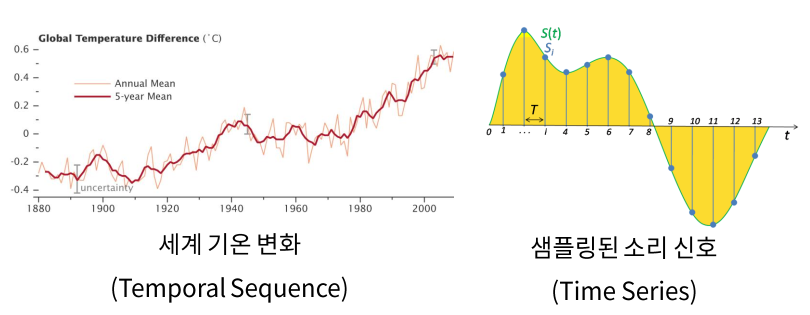

##  Sequence data의 예

### Sequence-to-vector (many to one)

- Sequence가 들어가면 Vector(하나)가 나오는 형태

- 예: 주가예측 : 4일간의 주가가 들어가면 그 다음날 주가가 나옴
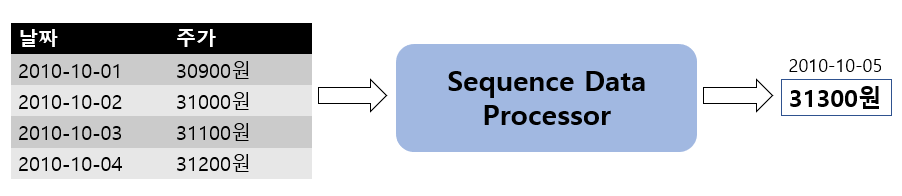
- Input: 4일간 주가
- Output: 5일째 주가

 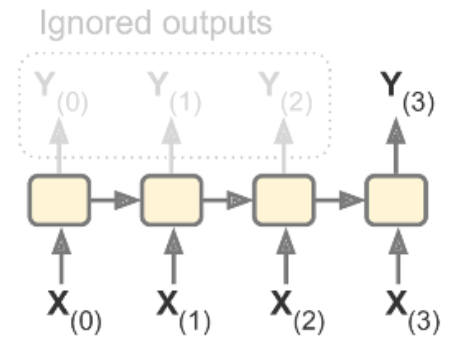

### sequence-to-sequence(many to many)
- 순서가 있는 여러 개의 데이터가 들어가서, 순서가 있는 여러 개의 데이터가 나오는 것
- 예: Machine translation (번역)
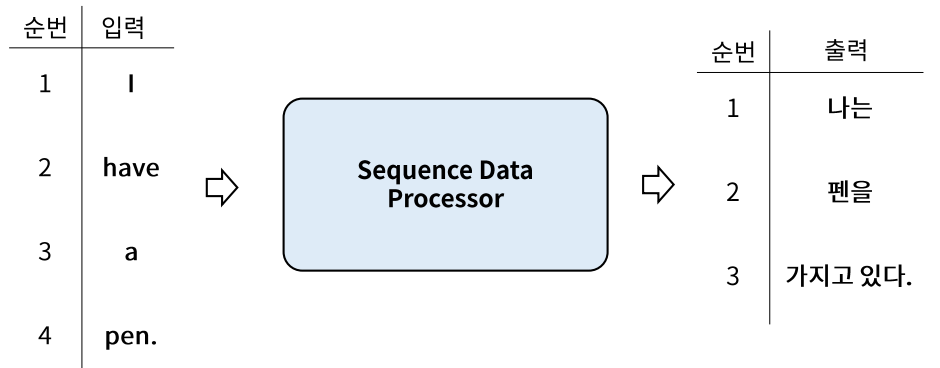    

- Input: 영어 문장 전체를 단어 단위로 순차적 입력
- Output: 번역된 한글 문장을 단어 단위로 순차적 출력
    

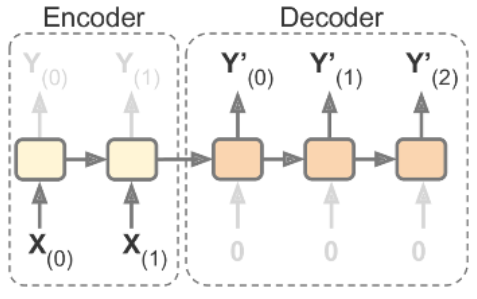

### Vector-to-sequence (one to many)
- 이미지 하나(Vector)가 들어가면 단어들(문장)이 나오는 형태 
- 예: Image captioning (이미지를 설명하는 문장을 만드는 것): 하나의 그림에 문장(단어들)이 나옴
    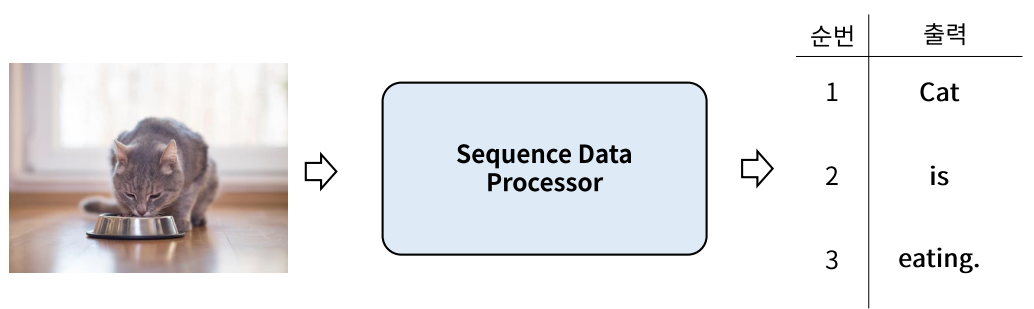

    - Input: 이미지
    - Output: 이미지에 대한 설명을 단어 단위로 순차적으로 출력 

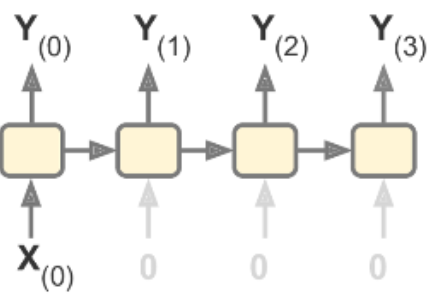

# RNN (Recurrent neural networks) 개요

## Memory System (기억시스템)

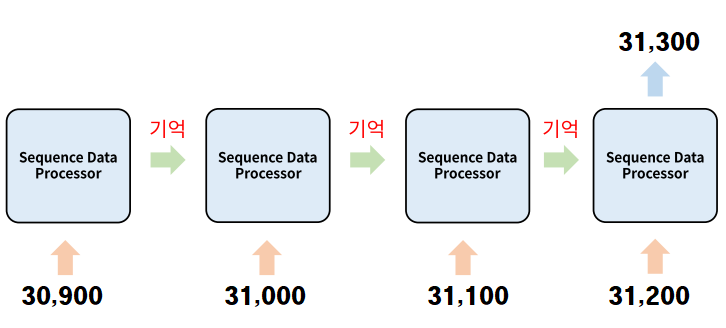

- 4일간의 주가 변화로 5일째 주가를 예측하려면, 입력받은 4일 간의 주가 순서를 기억하고 있어야 함
    - 이전에 처리된 결과를 기억하고 있음
    - 입력값이 2개: 이전 입력을 처리한 값, 입력값
    - 이전 입력 처리한 값을 변수로 저장해놓고 넘겨주는 형태
- Fully Connected Layer나 Convolution Layer의 출력은 이전 Data에 대한 출력에 영향을 받지 않음 -> 독립적

## Simple RNN

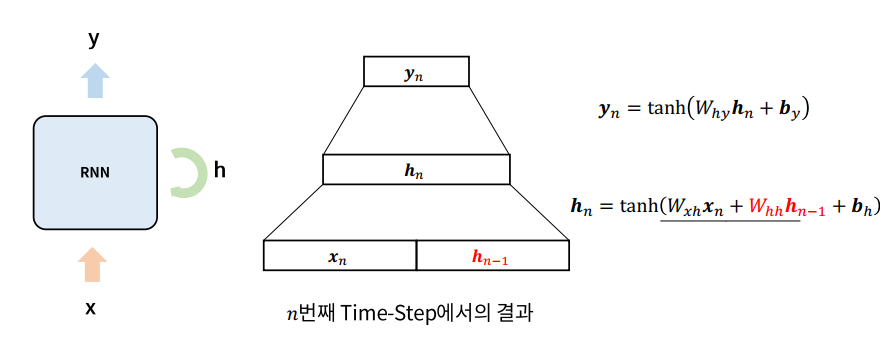

- RNN은 내부에 반복(Loop)를 가진 신경망의 한 종류
    - x 값이 들어와 내부적으로 처리한 값을 h에 저장하는 과정 반복 -> 최종적으로 y값 출력
- 각 입력 데이터는 순서대로 들어오며 Node/Unit은 **입력데이터($x$)와 이전 입력에 대한 출력 데이터($h_{n-1}$)**를 같이 입력받음
- 입력 데이터에 weight를 가중합한 값과 이전 입력에 대한 출력 값에 weight를 가중한 값을 더해 activation을 통과한 값이 출력값이 됨. 그리고 이 값을 다음 Sequence 데이터 처리에 전달

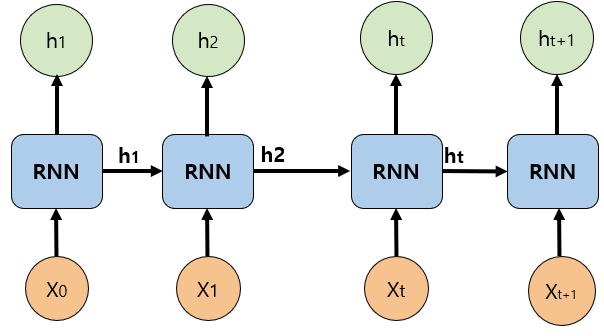

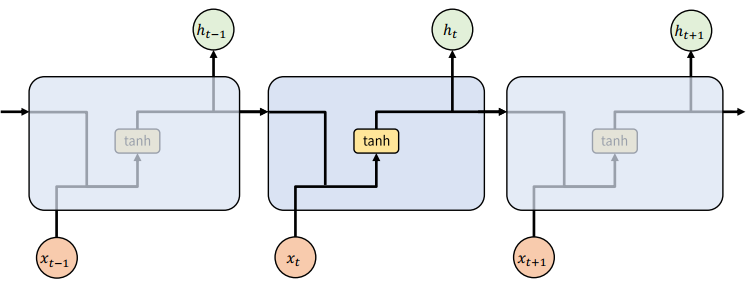

$$y_n = tanh(W_{xh} * X_n + W_{hh} * h_{n-1} + b_n)$$

### 기본 순환신경망의 문제
- Sequence가 긴 경우, 앞쪽의 기억이 뒤쪽에 영향을 미치지 못해 학습능력이 떨어짐
    - 경사 소실(Gradient Vanishing) 문제로 처음의 input값이 점점 잊혀지는 현상 발생 
- ReLU activation, parameter initialization의 조정 등 보다 모형의 문제를 구조적으로 해결하려는 시도 
    - Long Short Term Memory(LSTM; Hochreiter & Schmidhuber, 1997)
    - Gated Recurrent Unit(GRU; Kyunghyun Cho et al., 2014): LSTM의 계산량 줄인 모델

## LSTM (Long Short Term Memory)
- RNN을 개선한 변형 알고리즘
    - 3개의 입력값을 받음
    - 바로 전 time step의 처리결과와 전체 time step의 처리결과를 같이 받음
- 오래 기억할 것은 유지하고 잊어버릴 것은 빨리 잊어버리자

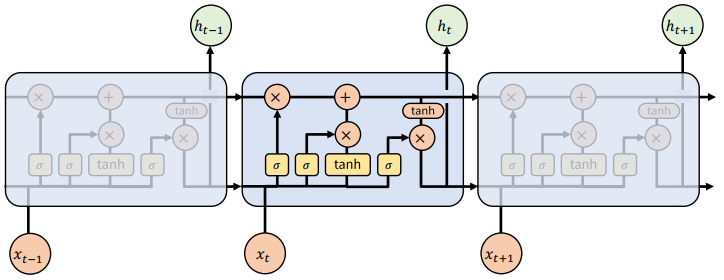

LSTM의 노드는 RNN의 hidden state에 Cell state를 추가로 출력
- Cell State 
    - 기억을 오래 유지하기 위해 전달하는 값
    - 이전 노드들에의 출력 값에 현재 입력에 대한 값을 더함
- Hidden State
    - 현재 처리된 것을 다음 단계로 넘겨주는 값
    
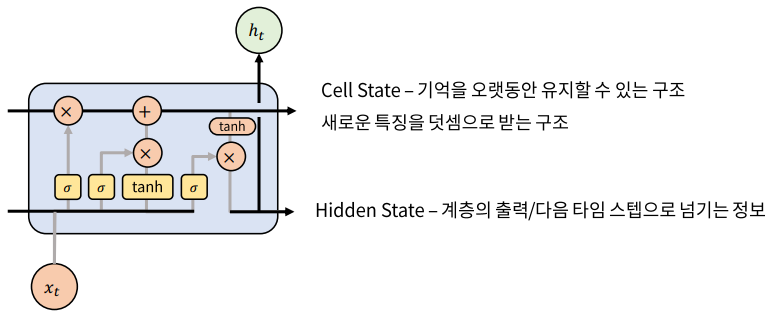

### LSTM의 구조
- Forget gate: Cell state에서 안 중요한 내용 잊어버리는 연산
- Input gate: 현재값을 Cell State(Long term memory)에 추가하는 역할
- output gate: 출력. 현재 정보 처리

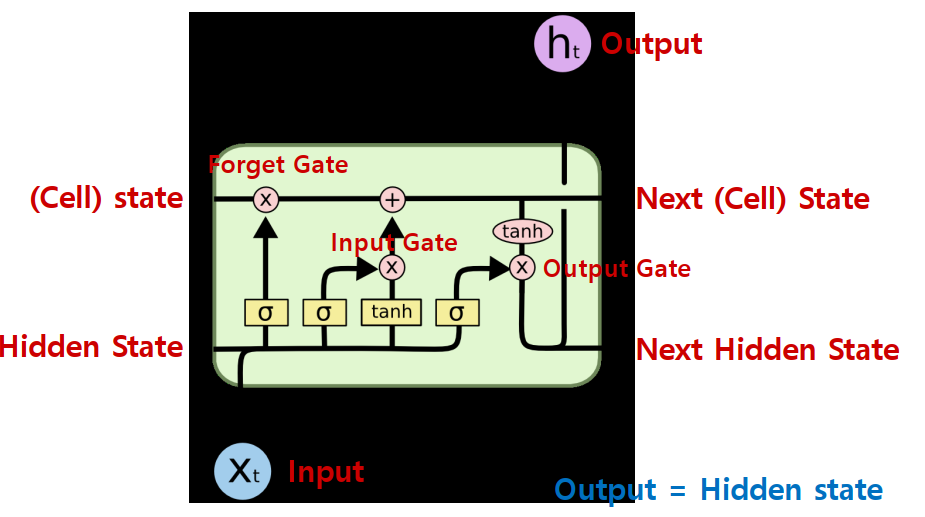

### Forget gate
- 현재 노드의 입력값을 기준으로 Cell state의 값에서 **얼마나 잊을지** 결정
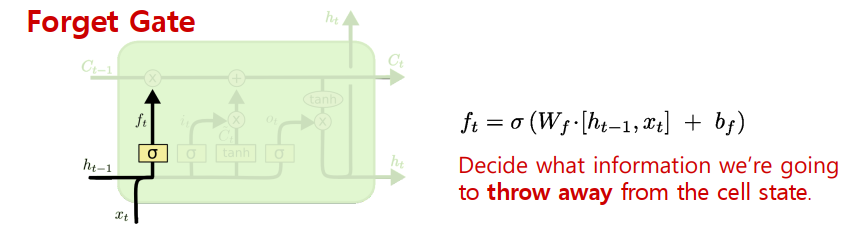

### Input gate
- 현재 노드의 입력값을 Cell state에 추가
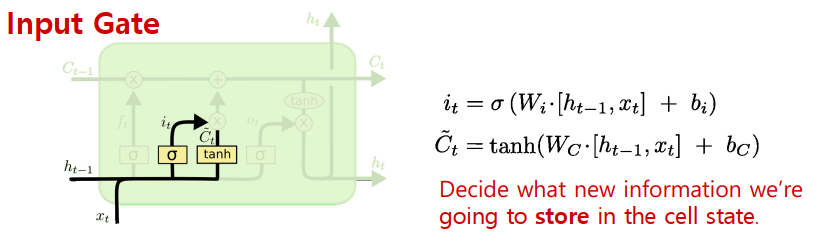

### Cell State 업데이트
- forget gate의 결과를 곱하고 input gate의 결과를 더함
    - 의미: 이전 메모리에 현재 입력으로 대체되는 것을 지우고 현재 입력의 결과를 더하는 것
    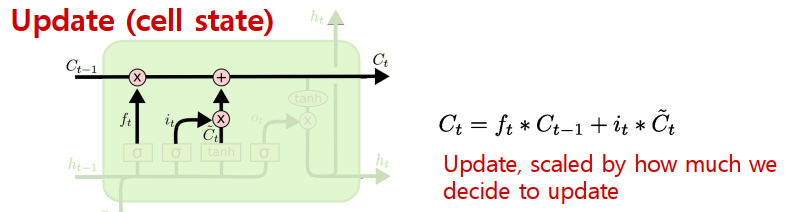

### Output gate
- LSTM에서 output은 hidden state로 다음 Input Data를 처리하는 Cell로 전달됨
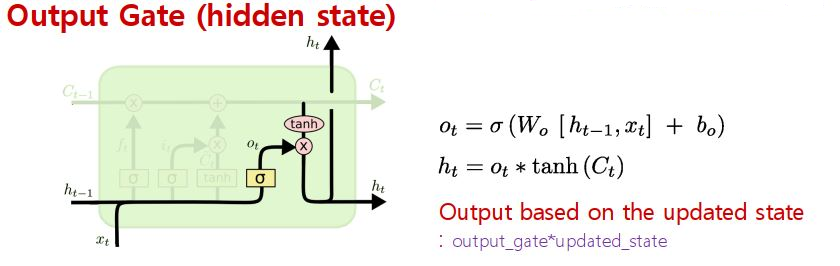